In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from natsort import natsorted

In [103]:
# autocovariance index in the cl matrix
n = 0
autocov_values = []
for k in range(14):
    for i in range(k,14):
        if i == k:
            autocov_values.append(n+1)
        n += 1

In [148]:
path = "/home/fcaldas/dados/UCLCLresults/cls-csv-bias/csv-bias-diveros-normmancl.dat"
cl_matrix_1 = np.loadtxt(path)

In [151]:
# path = "/home/ghoerning/cls/FileNzcl.dat"
path = "/home/fcaldas/dados/UCLCLresults/cls-csv-bias/csv_bias-diversoscl.dat"
cl_matrix_2 = np.loadtxt(path)

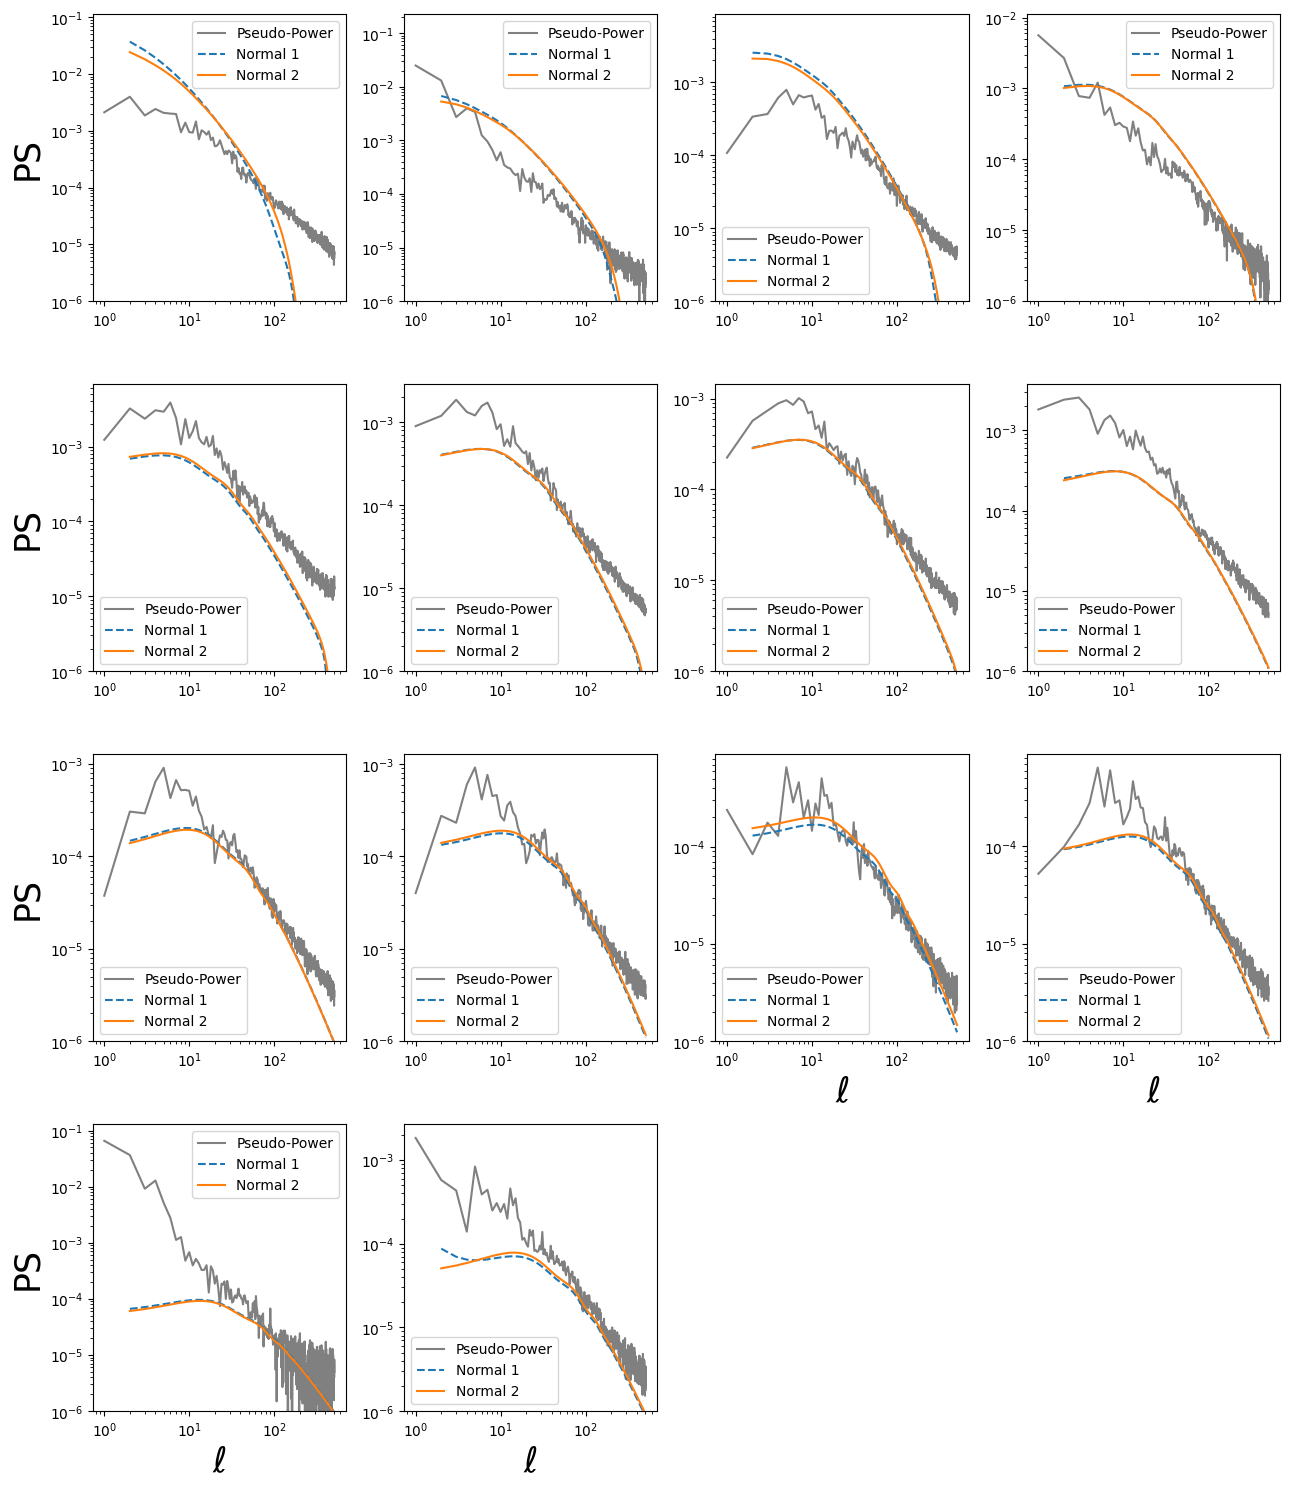

In [163]:
path = glob.glob("/home/fcaldas/dados/UCLCLresults/cls-csv-bias/N512_zbin_CL_z*.dat")
natsorted(path)

linhas = 4
colunas = 4

# Criar a figura e os subplots
fig, axs = plt.subplots(linhas, colunas, figsize=(13, 15))
for j in range(linhas*colunas):
    linha = j // colunas
    coluna = j % colunas
    
    plt.axes(axs[linha, coluna])

    # if don't have map to plot:
    if j+1>14:
        plt.axes(axs[linha, coluna]).axis('off')
        continue

    # titleValue = os.path.split(sysPath[i][j])[1][:-4]
    # titleValue = titleValue.split('-c-')[1]
    # plt.title(titleValue, size=18)

    l = cl_matrix_1[:,0]
    cl = cl_matrix_1[:,autocov_values[j]]

    l_2 = cl_matrix_2[:,0]
    cl_2 = cl_matrix_2[:,autocov_values[j]]
    
    cl_ps = np.loadtxt(path[j])
    l_ps = cl_ps[2:,0]
    ps = cl_ps[2:,1]
    
    plt.plot(l_ps,ps,
             color="gray",
             label = "Pseudo-Power")
    plt.plot(l_2,2*np.pi*cl_2/(l_2*(l_2+1)),
             '--',
             label="Normal 1")
    plt.plot(l,2*np.pi*cl/(l*(l+1)),
             label="Normal 2")
    # plt.plot(l,cl)
    

    plt.legend()
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(10**-6)
    
    if j in (10,11,12,13):
        plt.xlabel(r"$\ell$",size=25)
    if coluna==0:
        plt.ylabel("PS", size=25)
    
    
plt.tight_layout()
plt.show()


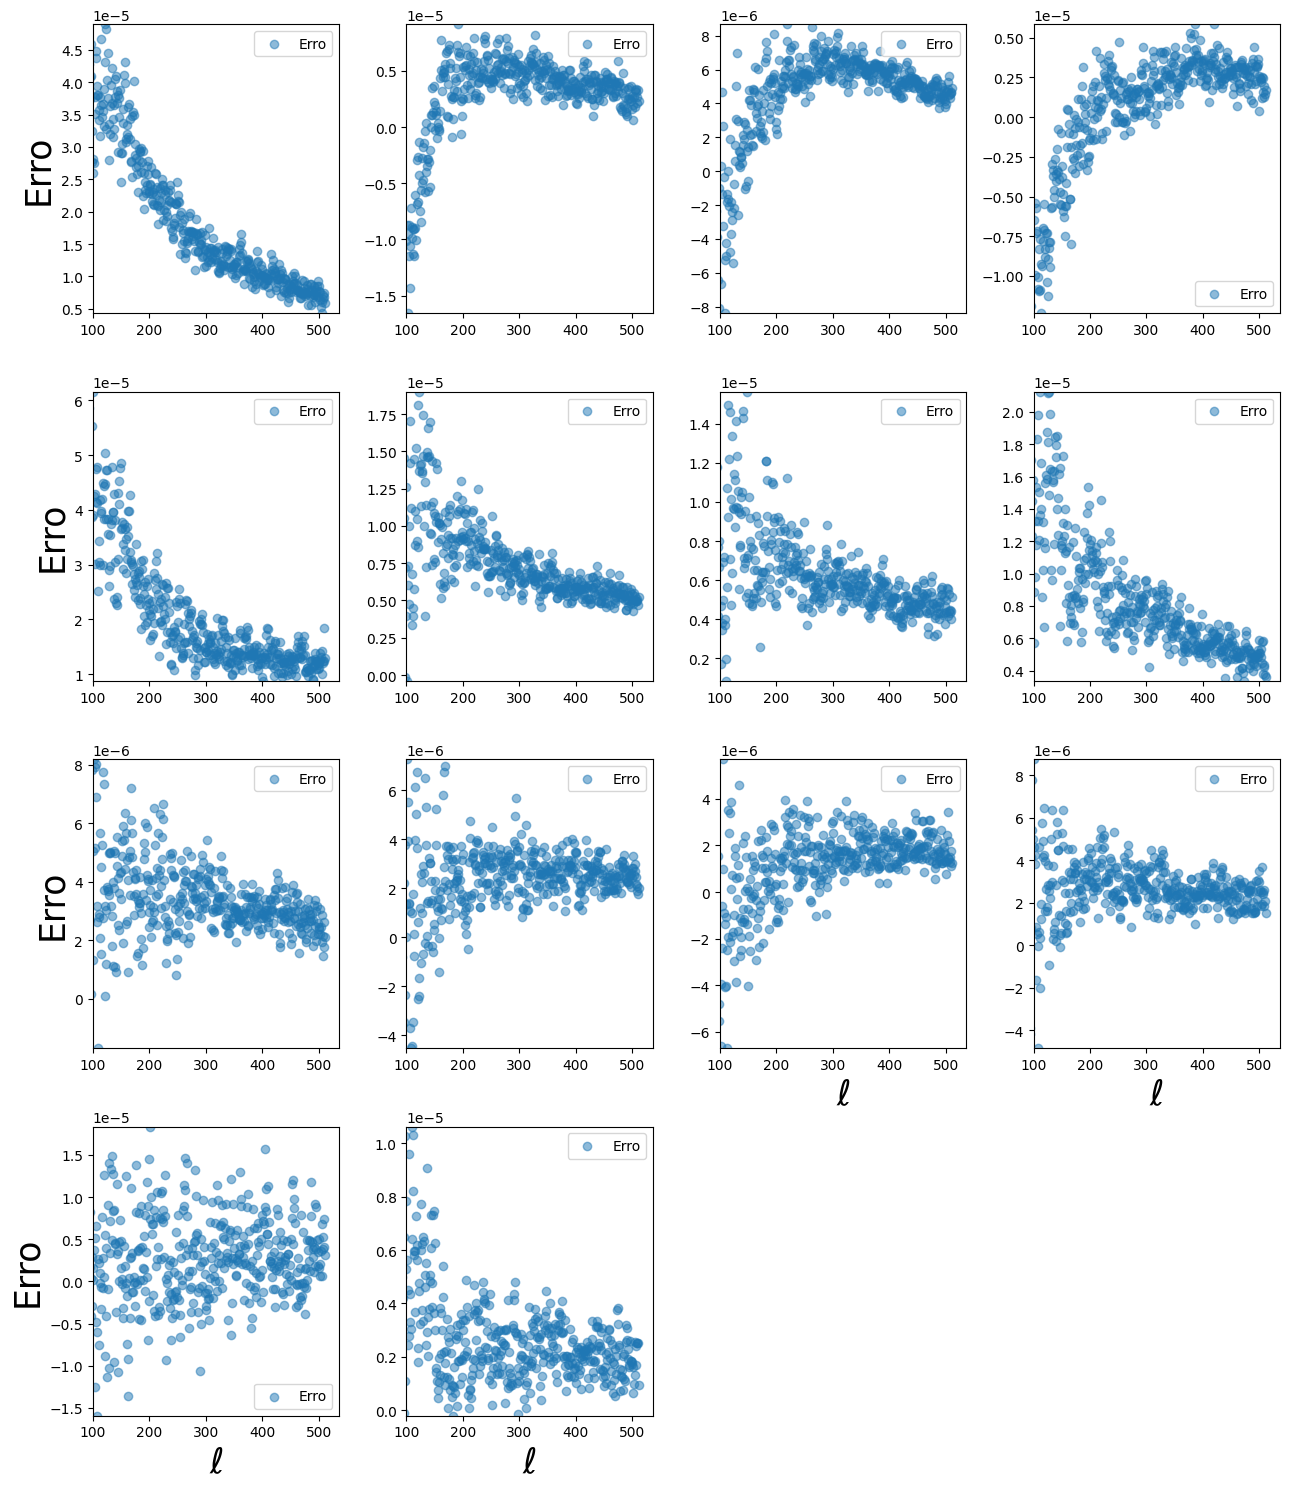

In [180]:
path = glob.glob("/home/fcaldas/dados/UCLCLresults/cls-csv-bias/N512_zbin_CL_z*.dat")
natsorted(path)

linhas = 4
colunas = 4

# Criar a figura e os subplots
fig, axs = plt.subplots(linhas, colunas, figsize=(13, 15))
for j in range(linhas*colunas):
    linha = j // colunas
    coluna = j % colunas
    
    plt.axes(axs[linha, coluna])

    # if don't have map to plot:
    if j+1>14:
        plt.axes(axs[linha, coluna]).axis('off')
        continue

    # titleValue = os.path.split(sysPath[i][j])[1][:-4]
    # titleValue = titleValue.split('-c-')[1]
    # plt.title(titleValue, size=18)

    l_2 = cl_matrix_2[:,0]
    cl_2 = cl_matrix_2[:,autocov_values[j]]
    
    cl_ps = np.loadtxt(path[j])
    l_ps = cl_ps[2:,0]
    ps = cl_ps[2:,1]

    erro = ps-(2*np.pi*cl_2/(l_2*(l_2+1)))
    plt.scatter(l_ps,erro,
                label = "Erro",
                alpha=0.5) 

    plt.legend()
    # plt.xscale('log')
    # plt.yscale('log')
    plt.ylim(min(erro[100:]),max(erro[100:512]))
    plt.xlim(100)
    
    if j in (10,11,12,13):
        plt.xlabel(r"$\ell$",size=25)
    if coluna==0:
        plt.ylabel("Erro", size=25)
    
    
plt.tight_layout()
plt.show()
